# A pronounced loss of tree crown foliation results in multi-year growth reduction

We train model to predict the growth of trees during a given period of 4-6 years based on the following features:

| Feature             | Meaning                             | Source            |
|---------------------|-------------------------------------|-------------------|
| defoliation_max     | Maximum defoliation of the plot     | [Add Source here] |
| dep_mg              | Deposition of Magnesium (Mg)        | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| dep_s_so4           | Deposition of Sulfate (SO₄)         | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| soph_avg_age        | Average age of trees in the plot    | [Add Source Here] |
| diameter_end        | End diameter of trees               | [Add Source Here] |
| social_class_min    | Minimum social class of trees (Social class :height of a tree relative to the surrounding trees)      | [CC-TRC](https://icp-forests.org/documentation/Surveys/CC/TRC.html) |
| dep_n_nh4           | Deposition of Ammonium (NH₄)        | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| dep_ph              | pH level of deposition              | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| dep_k               | Deposition of Potassium (K)         | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| soph_avg_sdi        | Average species diversity index     | [Add Source Here] |
| dep_n_tot           | Total Nitrogen (N) deposition       | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| ss_ni               | Soil solution Nickel (Ni) content   | [SS-SSM](https://icp-forests.org/documentation/Surveys/SS/SSM.html) |
| plot_orientation    | Orientation of the plot             | [SI-PLT](https://icp-forests.org/documentation/Surveys/SI/PLT.html) |
| dep_cond            | Conductivity of deposition          | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| ss_k                | Soil solution Potassium (K) content | [SS-SSM](https://icp-forests.org/documentation/Surveys/SS/SSM.html) |
| dep_alk             | Alkalinity of deposition            | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| plot_latitude       | Latitude of the plot                | [SI-PLT](https://icp-forests.org/documentation/Surveys/SI/PLT.html) |
| dep_doc             | Deposition of Dissolved Organic Carbon   | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
| country             | Country where the plot is located   | [SI-PLT](https://icp-forests.org/documentation/Surveys/SI/PLT.html) |
| ss_cond             | Soil solution conductivity          | [SS-SSM](https://icp-forests.org/documentation/Surveys/SS/SSM.html) |
|dep_mn               | Manganese concentration in a liquid medium, such as soil water, rainwater | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |
|dep_n_org (mg/L)         | Dissolved organic nitrogen | [DP-DEM](https://icp-forests.org/documentation/Surveys/DP/DEM.html) |



In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
# Main libraries
import shap
import numpy as np

# We will use Polars for data manipulation
import polars as pl

# Casting types from time to time to have a better autocompletion
from typing import cast

from models import train_and_explain, optimize_hyperparameters, ExperimentResults

In [3]:
group_col = "tree_id"
all_species = ["spruce", "pine", "beech", "oak"]

all_results: dict[str, ExperimentResults] = {}

for species in all_species:
    best_params, best_value = optimize_hyperparameters(species, group_col=group_col)
    all_results[species] = train_and_explain(species, best_params, group_col=group_col)

Training model for spruce
KS Statistic: 0.019460609288104724
P-value: 3.5e-05


/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l1 is set=1.3123269060860292e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3123269060860292e-07
[LightGBM] [Warning] lambda_l2 is set=0.00015048041354196693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015048041354196693
[LightGBM] [Warning] bagging_fraction is set=0.5619039372963892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619039372963892
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.6504249467152784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504249467152784
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l1 is set=1.3123269060860292e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3123269060860292e-07
[LightGBM] [Warning] lambda_l2 is set=0.00015048041354196693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015048041354196693
[LightGBM] [Warning] bagging_fraction is set=0.5619039372963892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619039372963892
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.6504249467152784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504249467152784
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l1 is set=1.3123269060860292e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3123269060860292e-07
[LightGBM] [Warning] lambda_l2 is set=0.00015048041354196693, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015048041354196693
[LightGBM] [Warning] bagging_fraction is set=0.5619039372963892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5619039372963892
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.6504249467152784, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6504249467152784
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l1 is set=2.3193744484612897e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3193744484612897e-06
[LightGBM] [Warning] lambda_l2 is set=1.5991289094975802e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5991289094975802e-06
[LightGBM] [Warning] bagging_fraction is set=0.8632878825956785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8632878825956785
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5592569954165069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5592569954165069
[LightGBM] [Warning] No further splits with positive gai

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l1 is set=2.3193744484612897e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3193744484612897e-06
[LightGBM] [Warning] lambda_l2 is set=1.5991289094975802e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5991289094975802e-06
[LightGBM] [Warning] bagging_fraction is set=0.8632878825956785, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8632878825956785
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] feature_fraction is set=0.5592569954165069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5592569954165069
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l1 is set=2.6242504857913124e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6242504857913124e-06
[LightGBM] [Warning] lambda_l2 is set=1.904375144252982e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904375144252982e-08
[LightGBM] [Warning] bagging_fraction is set=0.8987467501721609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8987467501721609
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.490204868377674

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l1 is set=2.6242504857913124e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6242504857913124e-06
[LightGBM] [Warning] 

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l1 is set=2.6242504857913124e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6242504857913124e-06
[LightGBM] [Warning] lambda_l2 is set=1.904375144252982e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904375144252982e-08
[LightGBM] [Warning] bagging_fraction is set=0.8987467501721609, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8987467501721609
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.4902048683776747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4902048683776747
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. 

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=2.3995604706268593e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3995604706268593e-05
[LightGBM] [Warning] lambda_l2 is set=0.11844729240519608, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11844729240519608
[LightGBM] [Warning] bagging_fraction is set=0.77263507152719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77263507152719
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.9317258064140852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9317258064140852
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current 

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

## Evaluate model performance for each species

Here we compute the mean and standard deviation of the $R^2$ (coefficient of determination) for all species and folds.

In [4]:
for species, results in all_results.items():
    perf = pl.from_dicts(results.performances).select(
        pl.first().cum_count().alias("fold"), "r2", "mae"
    )

    r2_mean = perf.select("r2").mean().item()
    r2_std = perf.select("r2").std().item()

    print(f"Results for {species}")
    print("Performance:")
    print(perf)
    print(f"R2: {r2_mean:.3f} ± {r2_std:.3f}")
    print()

Results for spruce
Performance:
shape: (5, 3)
┌──────┬──────────┬──────────┐
│ fold ┆ r2       ┆ mae      │
│ ---  ┆ ---      ┆ ---      │
│ u32  ┆ f64      ┆ f64      │
╞══════╪══════════╪══════════╡
│ 1    ┆ 0.503607 ┆ 0.156087 │
│ 2    ┆ 0.513186 ┆ 0.15095  │
│ 3    ┆ 0.52189  ┆ 0.15336  │
│ 4    ┆ 0.517152 ┆ 0.154601 │
│ 5    ┆ 0.530749 ┆ 0.151014 │
└──────┴──────────┴──────────┘
R2: 0.517 ± 0.010

Results for pine
Performance:
shape: (5, 3)
┌──────┬──────────┬──────────┐
│ fold ┆ r2       ┆ mae      │
│ ---  ┆ ---      ┆ ---      │
│ u32  ┆ f64      ┆ f64      │
╞══════╪══════════╪══════════╡
│ 1    ┆ 0.496666 ┆ 0.161019 │
│ 2    ┆ 0.444985 ┆ 0.168051 │
│ 3    ┆ 0.430556 ┆ 0.16818  │
│ 4    ┆ 0.454952 ┆ 0.165833 │
│ 5    ┆ 0.466087 ┆ 0.164292 │
└──────┴──────────┴──────────┘
R2: 0.459 ± 0.025

Results for beech
Performance:
shape: (5, 3)
┌──────┬──────────┬──────────┐
│ fold ┆ r2       ┆ mae      │
│ ---  ┆ ---      ┆ ---      │
│ u32  ┆ f64      ┆ f64      │
╞══════╪══════════╪══

## Plot predictions

Here we plot predictions for a given species and different folds. We highlight different `plot_id`s to verify that the model doesn't merely the same average for any given plot.

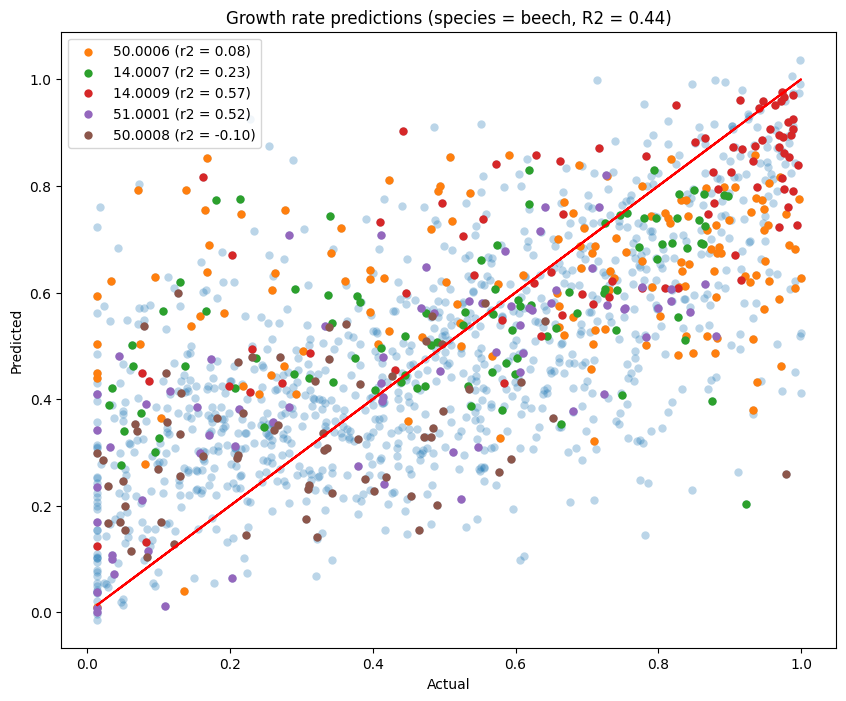

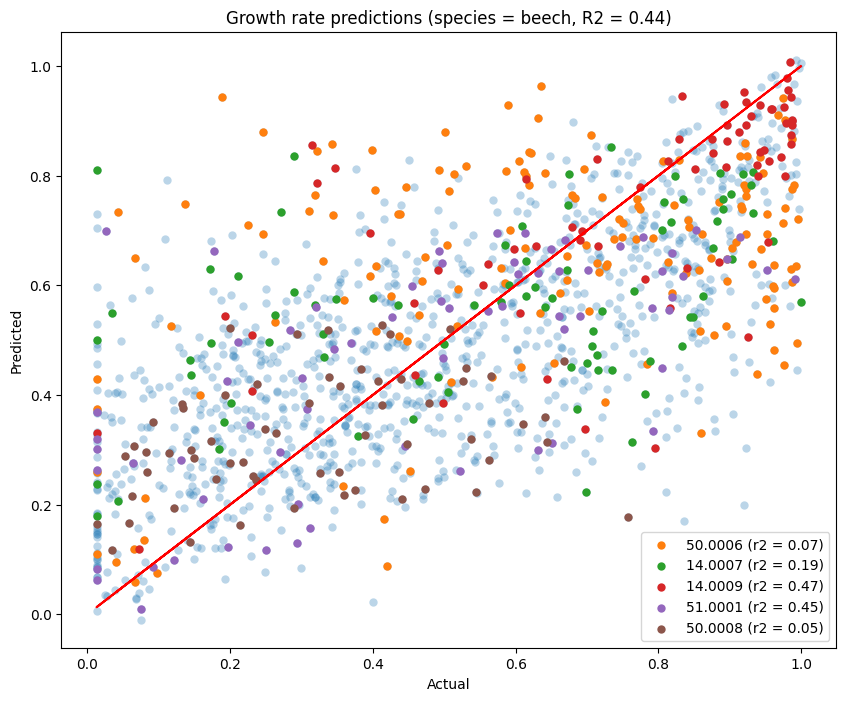

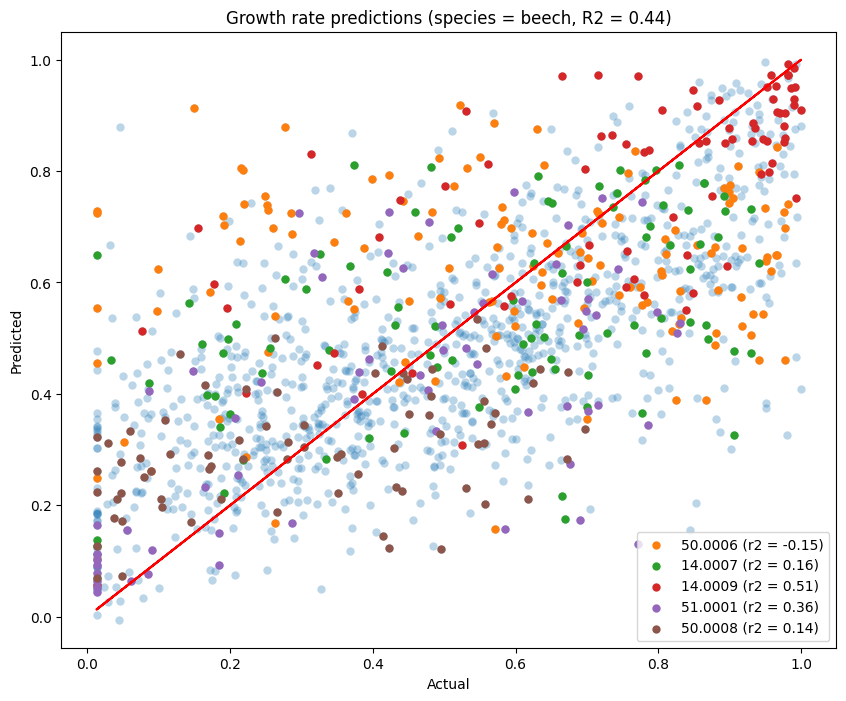

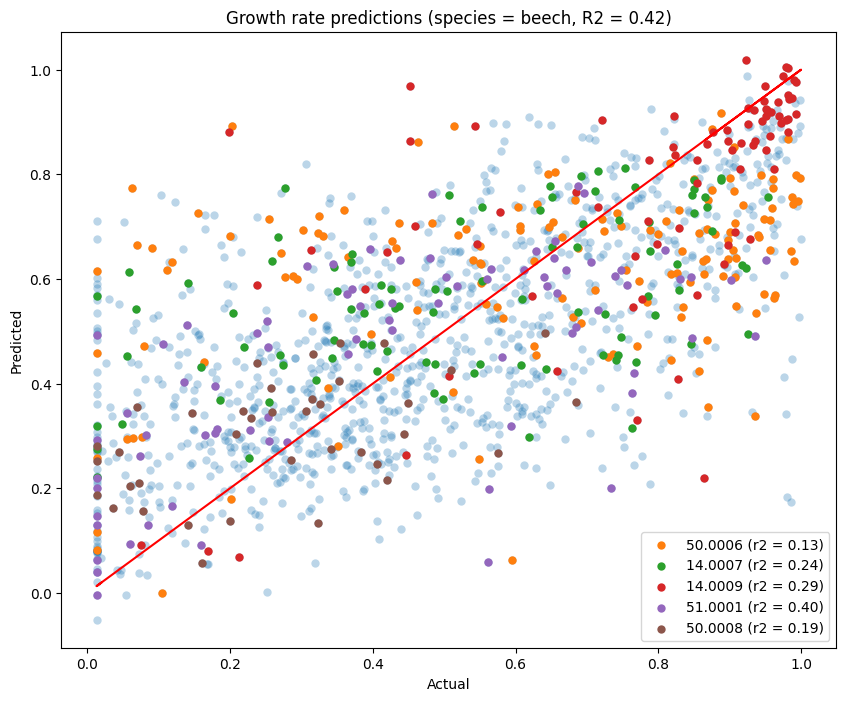

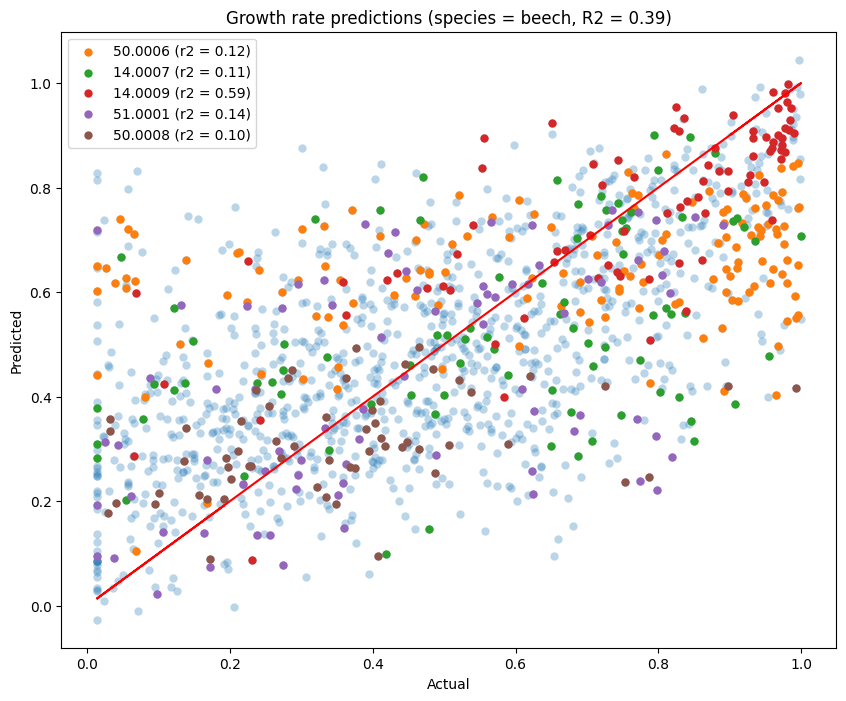

In [5]:
# Plot y_test vs y_pred
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from data import load_data

species = "beech"
results = all_results["beech"]

data = load_data(species)

plot_ids = (
    data.group_by("plot_id")
    .len()
    .sort("len", descending=True)
    .head(5)
    .select("plot_id")
    .to_series()
    .to_list()
)

for fold in range(5):
    # Get the results for the current fold
    _, y_true, y_pred = results.get_data(fold, "test")

    # Calculate R2
    r2_test = r2_score(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    plt.plot(y_true, y_true, color="red")
    plt.scatter(y_true, y_pred, alpha=0.3, linewidths=0)

    for plot_id in plot_ids:
        # Get the indices of the current fold
        indices = (
            data["plot_id"][results.get_indices(fold, "test")] == plot_id
        ).arg_true()
        r2_fold = r2_score(y_true[indices], y_pred[indices])

        plt.scatter(
            y_true[indices],
            y_pred[indices],
            label=f"{plot_id} (r2 = {r2_fold:.2f})",
            linewidths=0,
        )

    plt.legend()
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Growth rate predictions (species = {species}, R2 = {r2_test:.2f})")

# Feature importance by species

Here we show how feature importance varies by species.

Text(63.25893055555558, 0.5, 'Feature')

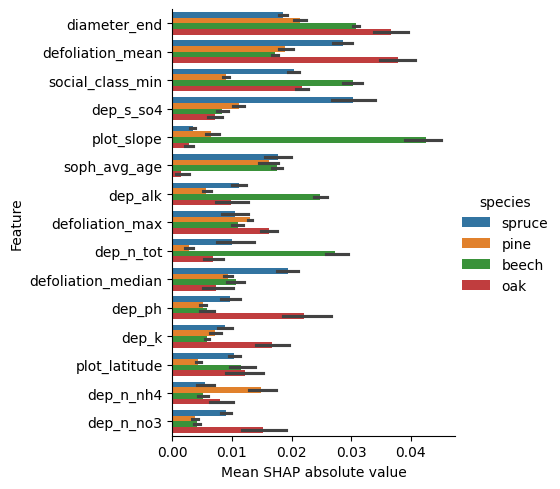

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

features = results.X.columns
top_n = 15

feature_importances = (
    pl.from_dicts(
        [
            {
                "species": species,
                "fold": fold,
                **dict(
                    zip(
                        features,
                        np.absolute(results.shap_values[fold].values).mean(axis=0),
                    )
                ),
            }
            for species, results in all_results.items()
            for fold in range(5)
        ]
    )
    .unpivot(
        on=pl.selectors.exclude("species", "fold"),  # type: ignore
        index=["species", "fold"],
        variable_name="feature",
        value_name="shap",
    )
    .with_columns(pl.col("shap").mean().over("feature").alias("importance"))
)

# Define order of features
order = (
    feature_importances.group_by("feature")
    .agg(pl.col("importance").mean().alias("importance"))
    .sort("importance", descending=True)["feature"]
    .to_list()[:top_n]
)

sns.catplot(
    feature_importances,
    x="shap",
    y="feature",
    hue="species",
    kind="bar",
    order=order,
)
plt.xlabel("Mean SHAP absolute value")
plt.ylabel("Feature")

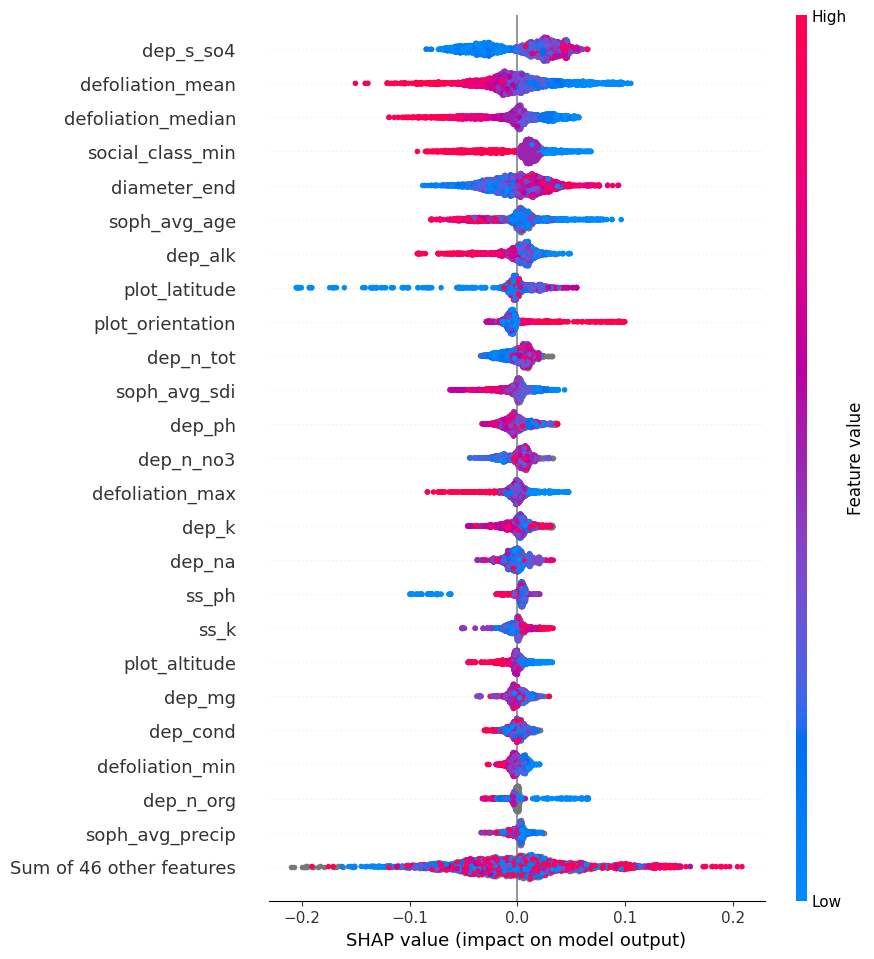

In [ ]:
species = "spruce"

results = all_results[species]

for fold in range(5):
    shap.plots.beeswarm(results.get_shap_values(fold, "test"), max_display=25)
    break  # TODO: remove for validation

## Custom plot of shapley values with interacting feature

We can compute the Shapley interactions using `get_shap_interactions`, which returns a tensor `(# samples, # features, # features)`, where each slice along the first axis is a symmetric matrix of interaction values, whose each row sums to the Shapley value for this feature. The diagonal entries represent the "main effect" attributed to that feature, whereas other entires represent the first-order interactions with every other feature.

> NOTE: Overall, it seems that these results aren't trustworthy and are too noisy.

We can possibly try to perform dimensionality reduction and/or visualization of matrices.

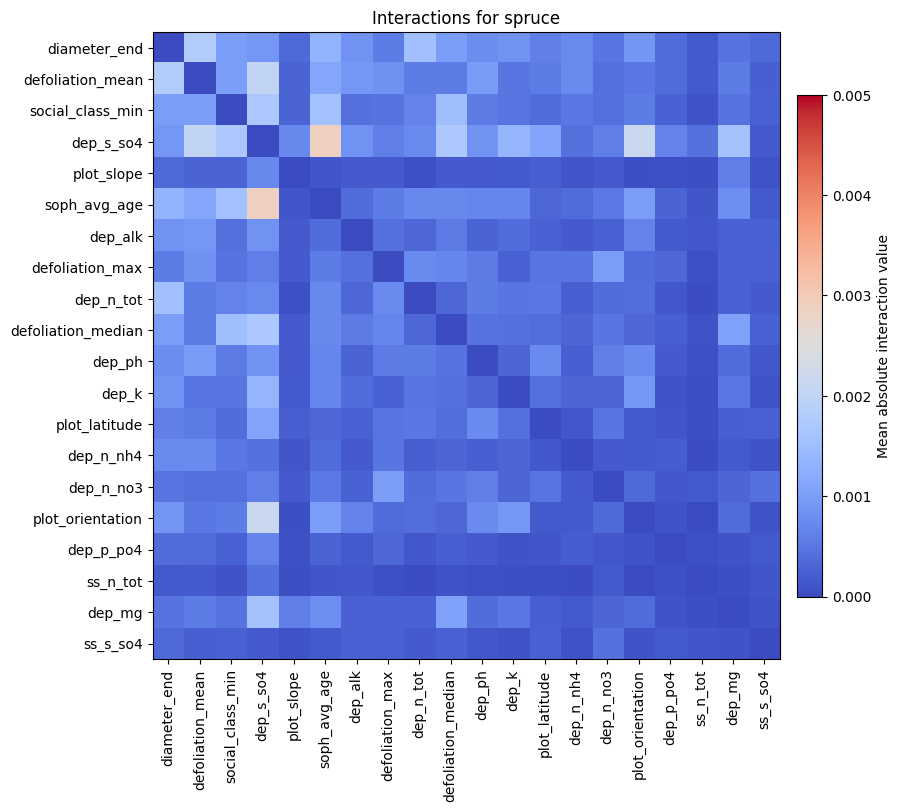

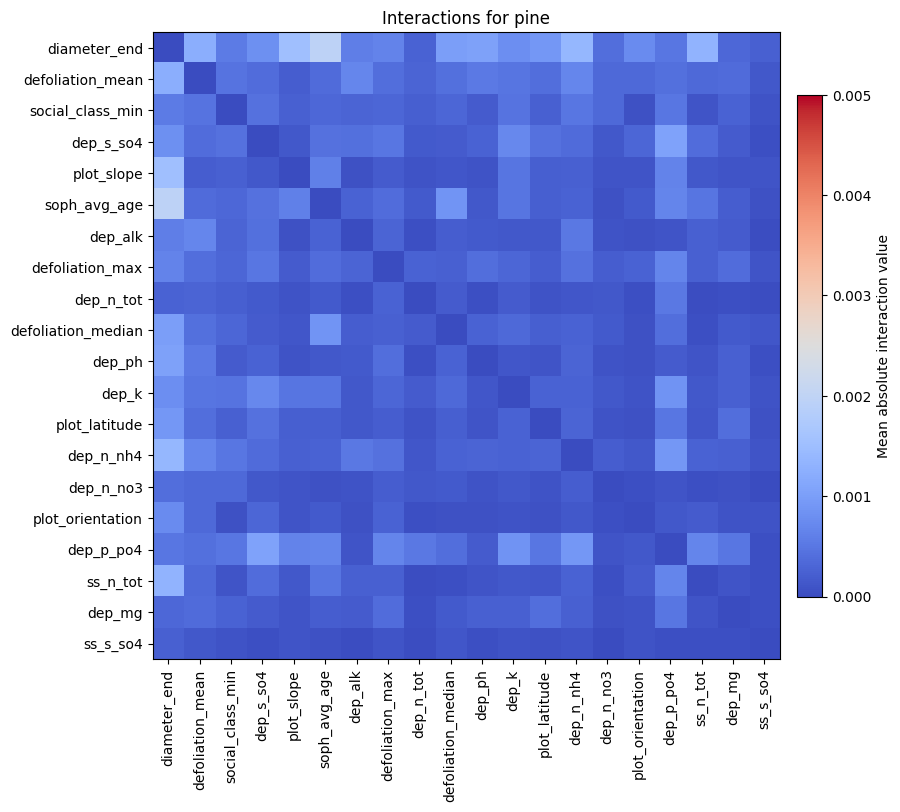

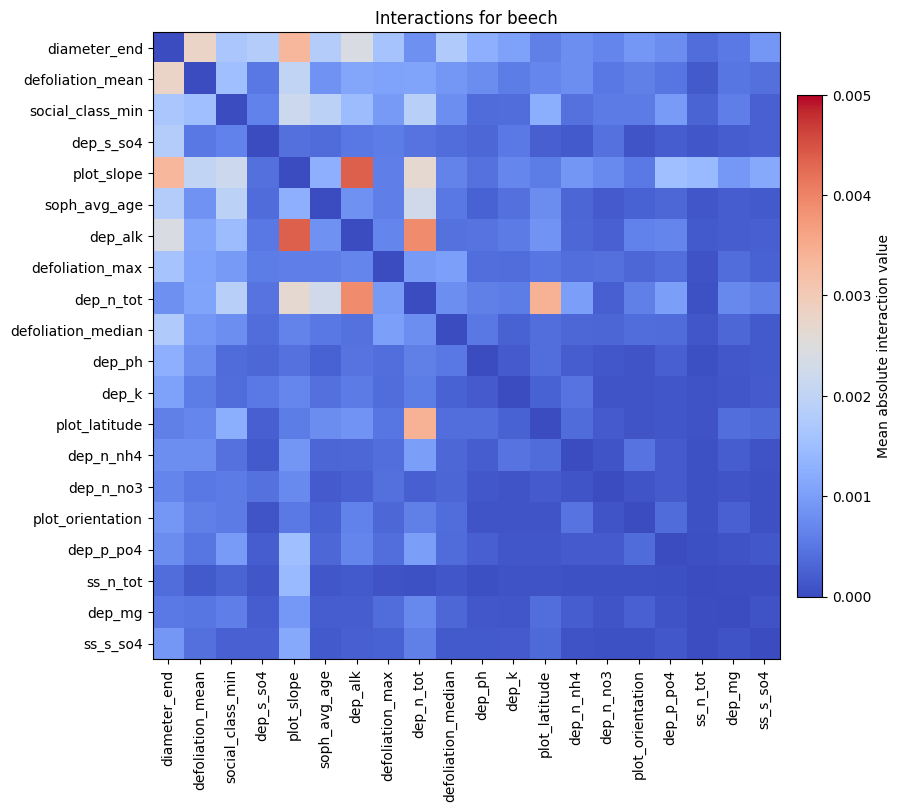

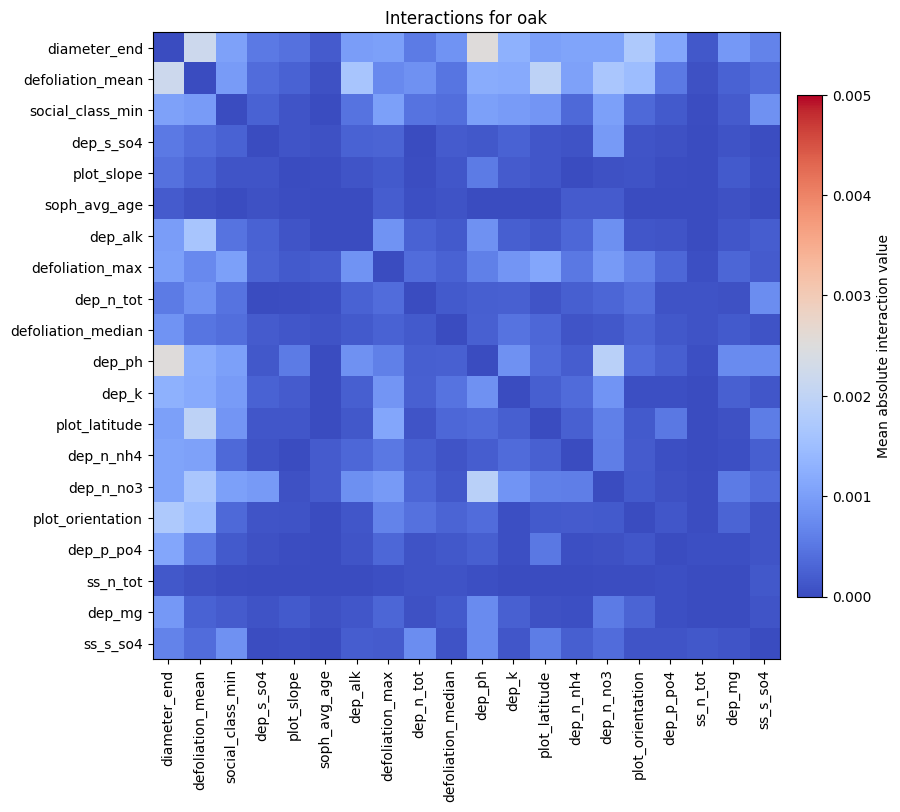

In [8]:
from explain import plot_interaction_matrix

top_n_features = (
    feature_importances.select("feature", "importance")
    .unique()
    .sort("importance", descending=True)
    .head(20)["feature"]
    .to_list()
)

# Loop over the species
for species in all_species:
    results = all_results[species]

    # Plot the mean absolute interaction values for the selected feature as a heatmap
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    interactions = plot_interaction_matrix(results, top_n=top_n_features, ax=ax)
    plt.tight_layout()
    plt.title(f"Interactions for {species}")

    plt.savefig(f"figures/{species}-interactions-mean.png")

# Plot interactions of a given feature

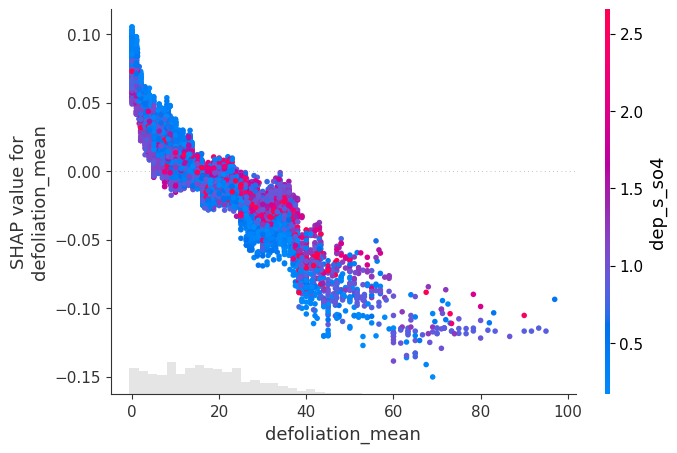

In [62]:
species = "spruce"
feature = "defoliation_mean"

results = all_results[species]

# Fetch interactions
interactions = plot_interaction_matrix(results, no_plotting=True)

# Construct a DataFrame of the interaction values
feature_idx = results.X.columns.index(feature)

df_interactions = pl.from_numpy(
    interactions[:, feature_idx, :],
    schema=results.X.columns,
)

# Show the top-10 interactions for the selected feature
top_interacting_feature = (
    df_interactions.unpivot(
        pl.selectors.exclude(feature),
        variable_name="feature",
        value_name="interaction",
    )
    .group_by("feature")
    .agg(pl.col("interaction").abs().mean())
    .sort("interaction", descending=True)
    .select("feature")
    .item(0, 0)
)


shap.plots.scatter(
    results.shap_values[fold][:, feature],
    color=results.shap_values[fold][:, top_interacting_feature],
)

Text(0.5, 1.0, 'Feature: defoliation_mean, R2 (linear) = 0.83, R2 (non-linear) = 0.88')

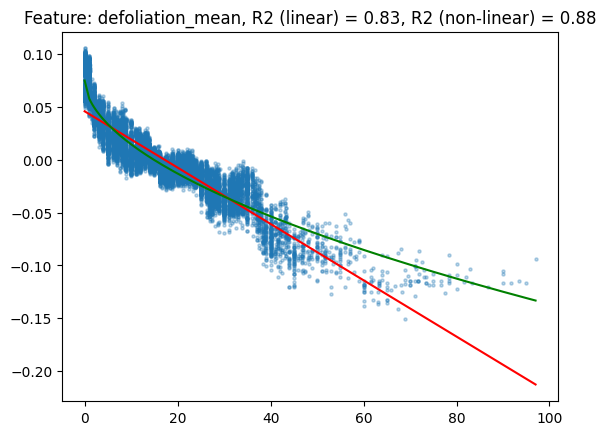

In [ ]:
# Fit a curve to the data
from scipy.optimize import curve_fit

shaps = results.shap_values[fold][:, feature].values
indices = results.get_indices(fold, "all")
feats = results.X[indices, feature].to_numpy()

# Order dataset by feature
order = np.argsort(feats)
feats = feats[order]
shaps = shaps[order]


# Define the function to fit
def func_nonlin(x, a, b, c):
    return a * x**c + b


def func_lin(x, a, b):
    return a * x + b


# Fit the curves
popt_nonlin, _ = curve_fit(func_nonlin, feats, shaps)
popt_lin, _ = curve_fit(func_lin, feats, shaps)

plt.scatter(feats, shaps, alpha=0.3, s=5)
plt.plot(feats, func_lin(feats, *popt_lin), color="red")
plt.plot(feats, func_nonlin(feats, *popt_nonlin), color="green")

# Calculate the goodness-of-fit
r2_lin = r2_score(shaps, func_lin(feats, *popt_lin))
r2_nonlin = r2_score(shaps, func_nonlin(feats, *popt_nonlin))

plt.title(
    f"Feature: {feature}, R2 (linear) = {r2_lin:.2f}, R2 (non-linear) = {r2_nonlin:.2f}"
)

[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l1 is set=2.3995604706268593e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3995604706268593e-05
[LightGBM] [Warning] lambda_l2 is set=0.11844729240519608, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11844729240519608
[LightGBM] [Warning] bagging_fraction is set=0.77263507152719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.77263507152719
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.9317258064140852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9317258064140852
[LightGBM] [Warning] Unknown parameter: min_gain_split
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current 

/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/research/hybrid-ai-lab/icp-paper/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gmermoud/code/res

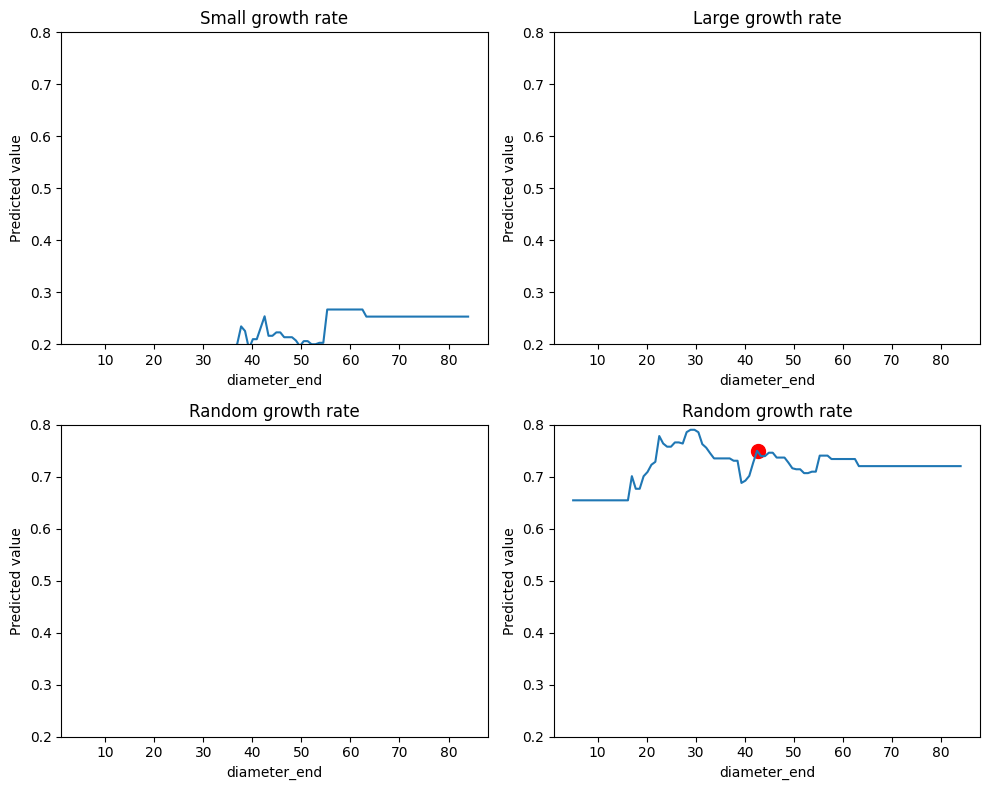

In [10]:
from explain import plot_ceteris_paribus_profile

fold = 0

X, y_true, _ = results.get_data(fold, "test")

# Plot 4 profiles for the selected feature
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    if i == 0:
        # Take one of the smallest growth rates
        idx = np.random.choice(np.argsort(y_true)[:10])
        title = "Small growth rate"
    elif i == 1:
        # Take one of the largest growth rates
        idx = np.random.choice(np.argsort(y_true)[::-1][:10])
        title = "Large growth rate"
    else:
        # Take a random growth rate
        idx = np.random.choice(range(10))
        title = "Random growth rate"

    feature_range, y_pred = plot_ceteris_paribus_profile(
        results.estimators[fold], X, idx, feature, ax=ax
    )
    ax.set_title(title)
    ax.set_ylim([0.2, 0.8])

plt.tight_layout()

## Explain a subset of the data

We explain only data within:

- A given climatic area (`boreal`, `high_altitude`, `dry`).

Decision plots for boreal (219 samples)
Not enough samples for boreal
Decision plots for temperate (2128 samples)
# of features: 70
# of samples: 2128
Expected target: 50.06%
Decision plots for high_altitude (0 samples)
Not enough samples for high_altitude
Decision plots for low_altitude (651 samples)
# of features: 70
# of samples: 651
Expected target: 50.06%
Decision plots for flat (1318 samples)
# of features: 70
# of samples: 1318
Expected target: 50.06%
Decision plots for hilly (104 samples)
Not enough samples for hilly
Decision plots for dry (19 samples)
Not enough samples for dry
Decision plots for humid (1 samples)
Not enough samples for humid


Text(0.5, 1.0, 'Feature importances by category (species = oak)')

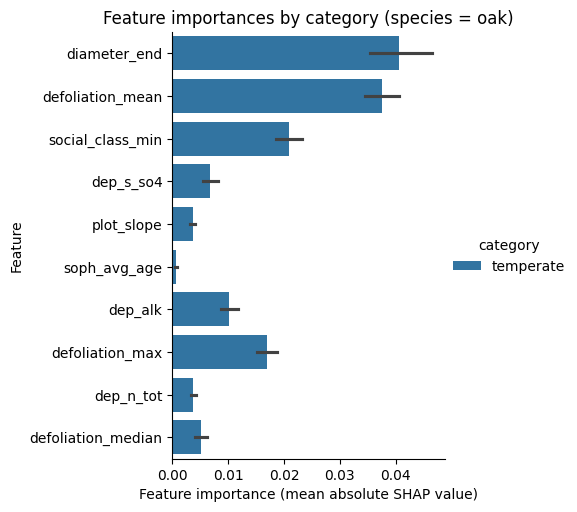

In [ ]:
fold_id = 0
species = "oak"
split = "all"
min_samples = 250

# Load the data and the corresponding results
data = load_data(species)
results = all_results[species]

# Different subsets of the data
subparts = {}

# # Extract only boreal vs temperate plots
subparts["boreal"] = data.select(
    pl.arg_where(pl.col("plot_latitude") >= 520000)
).to_series()
subparts["temperate"] = data.select(
    pl.arg_where(pl.col("plot_latitude") < 500000)
).to_series()

# Extract plots with high vs low altitude
subparts["high_altitude"] = data.select(
    pl.arg_where(pl.col("plot_altitude") >= 1200)
).to_series()
subparts["low_altitude"] = data.select(
    pl.arg_where(pl.col("plot_altitude") <= 250)
).to_series()

# Extract flat vs hilly plots
subparts["flat"] = data.select(pl.arg_where(pl.col("plot_slope") < 5)).to_series()
subparts["hilly"] = data.select(pl.arg_where(pl.col("plot_slope") > 10)).to_series()

# Extract only growth periods with high vs low precipitation
subparts["dry"] = data.select(pl.arg_where(pl.col("soph_avg_precip") < 400)).to_series()
subparts["humid"] = data.select(
    pl.arg_where(pl.col("soph_avg_precip") > 800)
).to_series()

shap_values_all = []
categories = []

for label, indices in subparts.items():
    print(f"Decision plots for {label} ({len(indices)} samples)")

    if len(indices) < min_samples:
        print(f"Not enough samples for {label}")
        continue

    X, y_true, y_pred = (
        results.X[indices],
        results.y_true[indices],
        results.y_pred[fold_id][indices],
    )
    print("# of features:", X.shape[1])
    print("# of samples:", X.shape[0])
    expected_value = cast(float, results.explainers[fold_id].expected_value)
    print(f"Expected target: {expected_value * 100:.2f}%")

    # Select n random samples
    select_indices = np.random.choice(X.shape[0], min_samples, replace=False)

    features = X[select_indices, :].to_pandas()
    shap_values = cast(
        np.ndarray, results.get_shap_values(fold_id, split)[select_indices].values
    )

    for idx in range(shap_values.shape[0]):
        shap_values_all.append(shap_values[idx, :])

    categories.extend([label] * shap_values.shape[0])

    # shap.decision_plot(
    #     expected_value, shap_values, features, feature_order="importance"
    # )

# Plot the feature importances by category
df = (
    pl.from_numpy(
        np.absolute(np.stack(shap_values_all, axis=1).T), schema=results.features
    )
    .with_columns(pl.Series("category", categories))
    .unpivot(
        on=pl.selectors.exclude("category"),
        variable_name="feature",
        value_name="importance",
        index=["category"],
    )
    .filter(pl.col("category").is_in(["boreal", "high_altitude", "dry", "temperate"]))
)

sns.catplot(
    df, x="importance", y="feature", hue="category", kind="bar", order=order[:10]
)
plt.xlabel("Feature importance (mean absolute SHAP value)")
plt.ylabel("Feature")
plt.title(f"Feature importances by category (species = {species})")

In [ ]:
# Plot the dependence plot for the top 10 features
top_features = (
    feature_importances.select("feature", "importance")
    .unique()
    .sort("importance", descending=True)
    .head(10)["feature"]
    .to_list()
)

for feature in top_features:
    shap.dependence_plot(
        feature,
        results.get_shap_values(fold_id, "all").values[indices],
        X.to_pandas(),
        interaction_index="auto",
        show=True,
        alpha=0.4,
    )

In [ ]:
# Visualize Shapley values using a PCA
from sklearn.decomposition import PCA

# Perform PCA for fold 0
fold = 0
pca = PCA(n_components=2)

# Normalize the Shapley values
X_shap = results.shap_values[fold].values
X_shap = np.nan_to_num((X_shap - X_shap.mean(axis=0)) / X_shap.std(axis=0))

# Train the PCA model
X_pca = pca.fit_transform(X_shap)

In [ ]:
# Scatter plot of the PCA with the top-5 features projected
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)

for label, indices in subparts.items():
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=label, alpha=0.6)

plt.legend()

# Compute the top features
feature_importances = np.absolute(results.shap_values[fold].values).mean(axis=0)
top_features = np.argsort(feature_importances)[::-1][:10]
print("Top features:", features.columns[top_features].to_list())

# Project the top-5 features
X_features = (
    400 * pca.transform(np.eye(X_shap.shape[1])) * feature_importances[:, np.newaxis]
)
for idx in top_features:
    plt.arrow(0, 0, X_features[idx, 0], X_features[idx, 1], color="black", width=0.05)
    plt.text(
        X_features[idx, 0] + 0.1,
        X_features[idx, 1] + 0.1,
        features.columns[idx],
        fontsize=12,
    )